#### <left>Бронников Максим Андреевич</left>

*M8О-307Б, №4 по списку*

#   <center>Лабораторная работа №3</center>
### <center> Задание №1 </center>

**Используя таблицу значений $ y_i $  функции $ y = f(x_i) $, вычисленных в точках $ x_i, $ $ i = 0, ..., 3 $ построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки $ (x_i, y_i) $.  Вычислить значение погрешности интерполяции в точке $ x^{*} $.**

### <center> Вариант №4 </center>

$ y = ctg(x) $

а)$ x_i = \displaystyle\frac{\pi}{8}, \; \displaystyle\frac{2\pi}{8}, \; \displaystyle\frac{3\pi}{8}, \; \displaystyle\frac{4\pi}{8} $

б)$ x_i = \displaystyle\frac{\pi}{8}, \; \displaystyle\frac{5\pi}{16}, \; \displaystyle\frac{3\pi}{8}, \; \displaystyle\frac{\pi}{2} $

$x^{*} = \displaystyle\frac{\pi}{3}$

## <center> Решение: </center>

### <center> Вспомогательные функции </center>

Импортируем бибилиотеки:

In [1]:
import matplotlib.pyplot as plt
import math
import sys
import numpy as np
from functools import reduce

Функция $ y = ctg(x) $

In [2]:
def f_x(x):
    return (1.0 / math.tan(x))

Декоратор, вычисляющий погрешность интерполяции функции $y = f(x)$ многочленом $P_n$:

In [3]:
def with_epsilon(P):
    def wrapper(x):
        print("Погрешность интерполяции:", abs(P(x) - f_x(x)))
        return P(x)
    return wrapper

### <center> Многочлен Лагранжа </center>

Коеффиценты $ \left\{ \displaystyle\frac{f_0}{\displaystyle\prod\limits_{j = 0, j \ne 0}^n (x_0 - x_j)}, ..., \displaystyle\frac{f_n}{\displaystyle\prod\limits_{j = 0, j \ne n}^n (x_n - x_j)} \right\}$ суммы:

In [4]:
# Multiply elems in order
def Prod(items = None):
    return reduce(lambda x, y: x*y, items)

# Compute order of znamenatels
def comp_order_znam(Xi):
    ans = []
    for item in Xi:
        ans.append(list(map(lambda it: item - it, filter(lambda it: it != item, Xi))))
    return map(lambda o: 1.0 / o, map(Prod, ans))

# Compute coeefs
def comp_coeffs(Xi, Yi):
    return [m*k for m, k in zip(Yi, comp_order_znam(Xi))]

Функция вычисления последовательности $\{\omega_0, ..., \omega_n\}$, где $ \omega_i = \displaystyle\prod\limits_{j = 0, j \ne i}^n (x - x_j)$

In [5]:
# comute order of chislitels
def omega_order(x, Xi):
    ans = []
    for item in Xi:
        ans.append(list(map(lambda it: x - it, filter(lambda it: it != item, Xi))))
    return map(Prod, ans)

Функция вычисляет многочлен Лагранжа $ L_n(x) = \displaystyle\sum\limits_{i = 0}^n f_n \displaystyle\prod\limits_{j = 0, j \ne n}^n \frac{(x - x_j)}{(x_n - x_j)} $ проводя препроцессинг коеффицентов независящих от $x$:

In [6]:
def lagrange_func(Xi, Yi):
    #compute coeefs
    coeffs = comp_coeffs(Xi, Yi)
    #return func
    return lambda x: sum([k*m for k, m in zip(coeffs, omega_order(x, Xi))])

### <center> Многочлен Нютона </center>

Функция вычисления разделенной разности: $f(x_0, x_1, ..., x_{n-1}, x_{n}) = \displaystyle\frac{f(x_0, x_1, ..., x_{n-1}) - f(x_1, ..., x_{n-1}, x_n)}{x_0 - x_n}$ с мемоизацией ранее подсчитанных разностей:

In [7]:
_memo = {}

# Set in memo values of f(x) that we get from table
def values_set(Xi, Yi):
    _memo.clear()
    _memo.update(dict(zip(Xi, Yi)))
    
def value_add(x, y):
    _memo.update({x: y})

def f(*args):
    s = len(args) - 1
    if not s:
        return _memo[args[0]]
    elif args in _memo:
        return _memo[args]
    args1 = args[:s]
    args2 = args[1:]
    ans = (f(*args1) - f(*args2)) / (args[0] - args[s])
    _memo.update({args: ans})
    return ans

Функция вычисления произведения $ p_i = \displaystyle\prod\limits_{j = 0}^{i - 1} (x - x_j)$

In [8]:
def order_mult(x, Xi, i):
    if not i:
        return 1.0
    return reduce(lambda a, b: a * b, map(lambda v: x - v, Xi[:i]))

Функция вычисления интерполяционного многочлена $P_n(x) = f(x_0) + (x - x_0)f(x_0, x_1) + ... + (x - x_0)...(x - x_{n-1})f(x_0, ..., x_n)$, а также функция добавления к подсчитанному многочлену нового узла:

In [9]:
def newton_interpol(Xi, Yi):
    values_set(Xi, Yi)
    return lambda x: sum([order_mult(x, Xi, i) * f(*tuple(Xi[:i+1])) for i in range(len(Xi))])

def add_to_newton(Xi, Yi, x, y, Pn):
    Xi.append(x)
    Yi.append(y)
    value_add(x, y)
    return lambda x: Pn(x) + order_mult(x, Xi, len(Xi) - 1) * f(*tuple(Xi))

### <center> Демонстрация работы </center>

**а)** Начальные значения задаем в коде:

In [10]:
Xi = [math.pi/8, 2*math.pi/8, 3*math.pi/8, 4*math.pi/8]
Yi = list(map(f_x, Xi))
Xt = math.pi/3.0

Протестируем *Лагранжа*:

In [11]:
Ln = lagrange_func(Xi, Yi)

Ln_e = with_epsilon(Ln)

print("Значение интерпояции:", Ln_e(Xt))

Погрешность интерполяции: 0.019375460635387087
Значение интерпояции: 0.5579748085542389


Протестируем *Ньютона*:

In [12]:
Pn = newton_interpol(Xi, Yi)

Pn_e = with_epsilon(Pn)

print("Значение интерпояции:", Pn_e(Xt))

Погрешность интерполяции: 0.0193754606353872
Значение интерпояции: 0.5579748085542388


*Ньютону* можно добавлять новые узлы без перерасчета старых:

In [13]:
Pn = add_to_newton(Xi, Yi, 2.0*math.pi/5.0, f_x(2.0*math.pi/5.0), Pn)

Pn_e = with_epsilon(Pn)

print("Значение интерпояции:", Pn_e(Xt))

Погрешность интерполяции: 0.012762258287688621
Значение интерпояции: 0.5901125274773146


**б)** Начальные данные считаем из файла:

In [14]:
Xi = []
Yi = []
with open("data/d1.txt", "r") as file:
    Xi = list(map(float, file.readline().split()))
    Yi = list(map(float, file.readline().split()))
    Xt = float(file.readline())

*Лагранж:*

In [15]:
Ln = lagrange_func(Xi, Yi)

Ln_e = with_epsilon(Ln)

print("Значение интерпояции:", Ln_e(Xt))

Погрешность интерполяции: 0.0038548965315179373
Значение интерпояции: 0.573495372658108


*Ньютон:*

In [16]:
Pn = newton_interpol(Xi, Yi)
Pn(Xt)

Pn_e = with_epsilon(Pn)

print("Значение интерпояции:", Pn_e(Xt))

Погрешность интерполяции: 0.0038548965315182704
Значение интерпояции: 0.5734953726581077


### <center> Графическое сравнение </center>

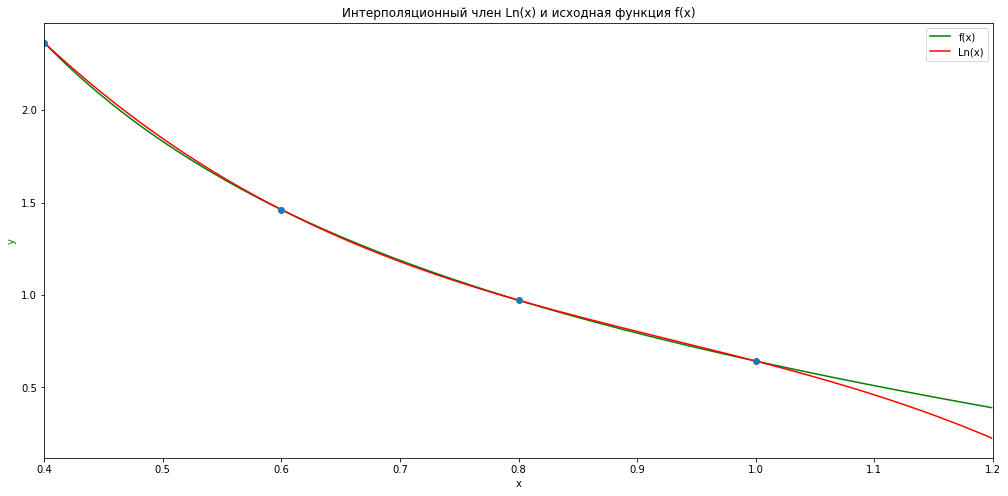

In [17]:
x = np.arange(0.4, 1.2, 0.001)
Xi = np.arange(0.4, 1.001, 0.2)

Yi = list(map(f_x, Xi))

Ln = lagrange_func(Xi, Yi)
y1 = list(map(f_x, x))
y2 = list(map(Ln, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y1, 'g', label="f(x)")
ax1.set_xlabel('x')
ax1.set_ylabel('y', color='g')


# create line plot of y2(x)
line2, = ax1.plot(x, y2, 'r', label="Ln(x)")

ax1.plot(list(Xi), list(Yi), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Интерполяционный член Ln(x) и исходная функция f(x)')
plt.xlim(0.4, 1.2)


# add a legend, and position it on the upper right
plt.legend((line1, line2), ("f(x)", "Ln(x)"))

plt.show()

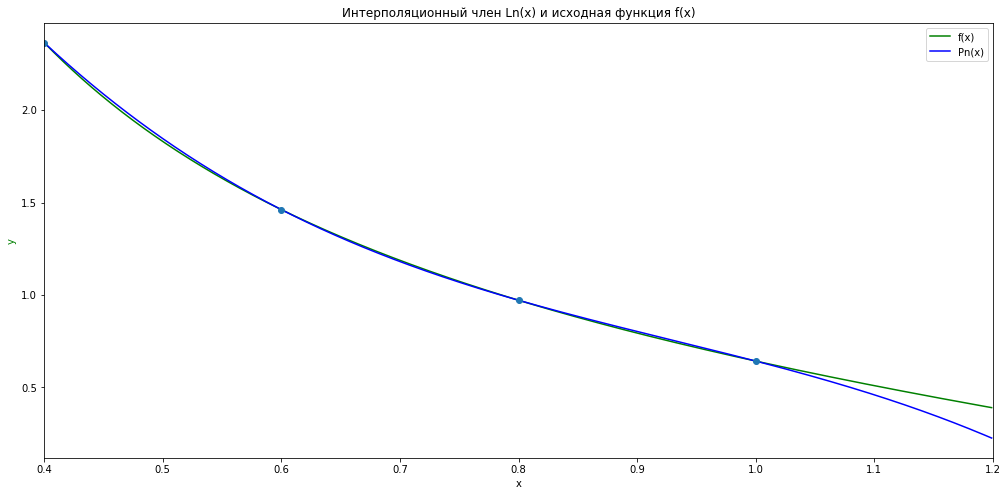

In [18]:
Pn = newton_interpol(Xi, Yi)
y2 = list(map(Pn, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y1, 'g', label="f(x)")
ax1.set_xlabel('x')
ax1.set_ylabel('y', color='g')


# create line plot of y2(x)
line2, = ax1.plot(x, y2, 'b', label="Pn(x)")

ax1.plot(list(Xi), list(Yi), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Интерполяционный член Ln(x) и исходная функция f(x)')
plt.xlim(0.4, 1.2)


# add a legend, and position it on the upper right
plt.legend((line1, line2), ("f(x)", "Pn(x)"))

plt.show()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>01.04.2020</center>